In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers

In [40]:
train_path = '../input/symptoms/Numerical Dataset/Training.csv'
test_path = '../input/symptoms/Numerical Dataset/Testing.csv'

In [41]:
train_df = pd.read_csv(train_path)

In [42]:
train_df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,02/11/2020,0,0,0,0,0,0,male,Other,0
1,08/11/2020,0,0,0,0,0,0,male,Other,0
2,06/10/2020,0,0,0,0,0,0,female,Other,0
3,13/09/2020,0,0,0,0,0,0,male,Other,0
4,23/09/2020,0,0,0,0,0,0,male,Other,0
...,...,...,...,...,...,...,...,...,...,...
824574,23/09/2020,0,0,0,0,0,0,female,Other,1
824575,14/09/2020,0,0,0,0,0,0,female,Other,1
824576,25/09/2020,0,0,0,0,1,0,male,Other,1
824577,29/09/2020,0,0,0,0,0,0,male,Contact with confirmed,1


In [43]:
train_df.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
age_60_and_above       object
gender                 object
test_indication        object
corona_result           int64
dtype: object

In [44]:
test_df = pd.read_csv(test_path)

In [45]:
train_size = train_df.size
test_size = test_df.size

In [46]:
target = 'corona_result'

In [47]:
train_df['corona_result'] = train_df['corona_result'].astype(str)

In [48]:
train_split = 0.9
val_split = 1-train_split

In [49]:
train_only_size = int(train_split * train_size)
val_only_size = int(val_split * train_size)

In [50]:
train_df2 = train_df.copy()
train_df2['test_date'] = train_df['test_date'].str.split('/',expand=True)[1]

In [51]:
train_df2['test_date'].value_counts()

09    372070
10    331428
11    121081
Name: test_date, dtype: int64

In [52]:
train_df2['test_date'] = train_df2['test_date'].astype(str).astype(int)

In [53]:
#train_df2['corona_result'] = train_df2['corona_result'].astype(str).map({'0':'NORMAL','1':'COVID'})
#.astype(int)
#train_df2['corona_result'] = pd.cut(train_df2['corona_result'],[0,1,np.inf],labels=['NORMAL','COVID'])

In [54]:
train_df2['corona_result'].value_counts()

0    740232
1     84347
Name: corona_result, dtype: int64

In [55]:
train_df2['age_60_and_above'] = train_df2['age_60_and_above'].mask(train_df2['age_60_and_above'] == '_','0')
test_df['age_60_and_above'] = test_df['age_60_and_above'].mask(test_df['age_60_and_above'] == '_','0')

In [56]:
train_only_df, val_only_df = np.split(train_df2.sample(frac=1),[int(train_split*len(train_df2))])

In [57]:
train_only_df.to_csv("train.csv",index=False)
val_only_df.to_csv("valid.csv",index=False)

In [58]:
train_only_df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
688865,9,0,0,0,0,0,0,male,Other,0
423582,10,0,0,0,0,0,0,male,Other,0
430062,9,0,0,0,0,0,0,male,Other,0
422162,10,0,0,0,0,0,1,female,Other,0
689127,9,0,0,0,0,0,0,male,Other,0
...,...,...,...,...,...,...,...,...,...,...
604687,9,0,0,0,0,0,0,male,Other,0
103037,9,0,0,0,0,0,0,male,Other,0
734164,10,0,0,0,0,0,0,male,Other,0
352548,10,0,0,0,0,0,0,male,Other,0


In [59]:
train_only_path = '../input/symptoms-wdate-v4/train.csv'
valid_only_path = '../input/symptoms-wdate-v4/valid.csv'

In [60]:
import seaborn as sns

<AxesSubplot:xlabel='gender', ylabel='Count'>

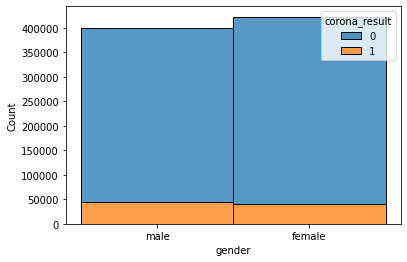

In [61]:
sns.histplot(x='gender',hue='corona_result',data=train_df,stat="count", multiple="stack")

<AxesSubplot:xlabel='cough', ylabel='Count'>

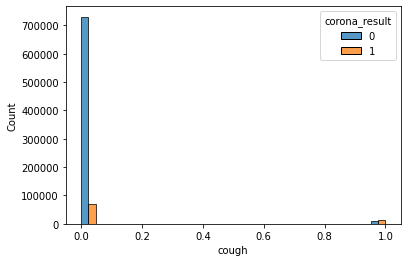

In [62]:
sns.histplot(x='cough',hue='corona_result',data=train_df,stat="count", multiple="dodge")

<AxesSubplot:xlabel='fever', ylabel='Count'>

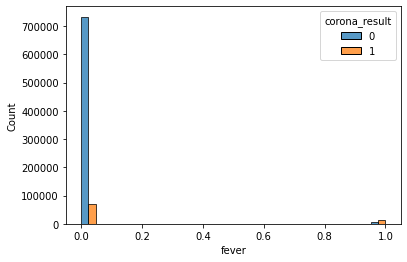

In [63]:
sns.histplot(x='fever',hue='corona_result',data=train_df,stat="count", multiple="dodge")

<AxesSubplot:xlabel='sore_throat', ylabel='Count'>

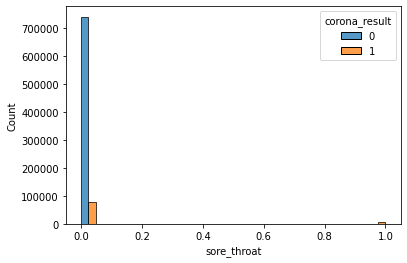

In [64]:
sns.histplot(x='sore_throat',hue='corona_result',data=train_df,stat="count", multiple="dodge")

<AxesSubplot:xlabel='shortness_of_breath', ylabel='Percent'>

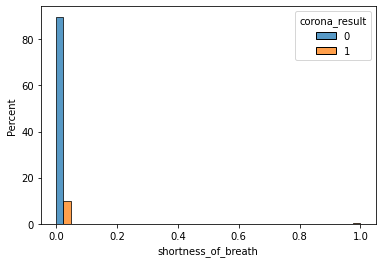

In [65]:
sns.histplot(x='shortness_of_breath',hue='corona_result',data=train_df,stat="percent", multiple="dodge")

<AxesSubplot:xlabel='head_ache', ylabel='Percent'>

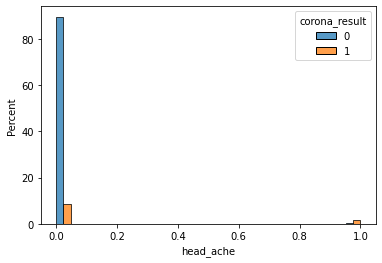

In [66]:
sns.histplot(x='head_ache',hue='corona_result',data=train_df,stat="percent", multiple="dodge")

<AxesSubplot:xlabel='age_60_and_above', ylabel='Percent'>

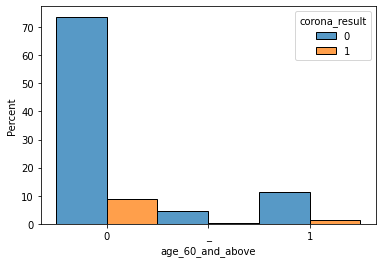

In [67]:
sns.histplot(x='age_60_and_above',hue='corona_result',data=train_df,stat="percent", multiple="dodge")

<AxesSubplot:xlabel='test_indication', ylabel='Percent'>

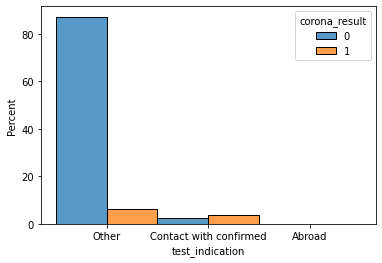

In [68]:
sns.histplot(x='test_indication',hue='corona_result',data=train_df,stat="percent", multiple="dodge")

## Training setup

In [69]:
batch_size = 16

In [70]:
"""full_train_ds = tf.data.experimental.make_csv_dataset(
    train_path,
    batch_size=batch_size,
    label_name='corona_result',
    #num_epochs=1,
    shuffle_buffer_size=100000,
    shuffle_seed = 12,
    ignore_errors=True,
    header=True)
    """

"full_train_ds = tf.data.experimental.make_csv_dataset(\n    train_path,\n    batch_size=batch_size,\n    label_name='corona_result',\n    #num_epochs=1,\n    shuffle_buffer_size=100000,\n    shuffle_seed = 12,\n    ignore_errors=True,\n    header=True)\n    "

In [71]:
train_ds = tf.data.experimental.make_csv_dataset(
    train_only_path,
    batch_size=batch_size,
    label_name='corona_result',
    num_epochs=1,
    shuffle_buffer_size=100000,
    shuffle_seed = 12,
    ignore_errors=True,
    header=True)

In [72]:
val_ds = tf.data.experimental.make_csv_dataset(
    valid_only_path,
    batch_size=batch_size,
    label_name='corona_result',
    num_epochs=1,
    shuffle_buffer_size=100000,
    shuffle_seed = 12,
    ignore_errors=True,
    header=True)

In [73]:
#train_ds = full_train_ds.take(train_only_size)  
#remaining = full_train_ds.skip(train_only_size)  
#val_ds = remaining.take(val_only_size)

In [74]:
[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of genders:', train_features['gender'])
print('A batch of targets:', label_batch )

2022-01-27 12:31:20.105993: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Every feature: ['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'test_indication']
A batch of genders: tf.Tensor(
[b'male' b'female' b'female' b'female' b'male' b'male' b'male' b'female'
 b'female' b'male' b'male' b'male' b'male' b'female' b'male' b'female'], shape=(16,), dtype=string)
A batch of targets: tf.Tensor([0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int32)


## Preprocessing

In [75]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [76]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [77]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    # Create a lookup layer which will turn strings into integer indices
    lookup = lookup_class(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = lookup(feature)
    return encoded_feature

In [78]:
"""
all_inputs = []
encoded_features = []
categorical_cols = ['gender','test_indication']

for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)
for header in ['cough',	'fever',	'sore_throat',	'shortness_of_breath',	'head_ache',	'age_60_and_above']:
    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
    all_inputs.append(categorical_col)
    encoded_features.append(categorical_col)
"""

"\nall_inputs = []\nencoded_features = []\ncategorical_cols = ['gender','test_indication']\n\nfor header in categorical_cols:\n  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')\n  encoding_layer = get_category_encoding_layer(name=header,\n                                               dataset=train_ds,\n                                               dtype='string',\n                                               max_tokens=5)\n  encoded_categorical_col = encoding_layer(categorical_col)\n  all_inputs.append(categorical_col)\n  encoded_features.append(encoded_categorical_col)\nfor header in ['cough',\t'fever',\t'sore_throat',\t'shortness_of_breath',\t'head_ache',\t'age_60_and_above']:\n    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')\n    all_inputs.append(categorical_col)\n    encoded_features.append(categorical_col)\n"

In [79]:
from tensorflow import keras
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup

In [80]:
"""
test_date               int64
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
age_60_and_above        int64
gender                 object
test_indication        object
corona_result          object
dtype: object
"""

# Categorical features encoded as integers
#gender = keras.Input(shape=(1,), name="gender", dtype="int64")
cough = keras.Input(shape=(1,), name="cough", dtype="int64")
fever = keras.Input(shape=(1,), name="fever", dtype="int64")
sore_throat = keras.Input(shape=(1,), name="sore_throat", dtype="int64")
shortness_of_breath = keras.Input(shape=(1,), name="shortness_of_breath", dtype="int64")
head_ache = keras.Input(shape=(1,), name="head_ache", dtype="int64")
test_date = keras.Input(shape=(1,), name="test_date", dtype="int64")
age_60_and_above = keras.Input(shape=(1,), name="age_60_and_above", dtype="int64")
# Categorical feature encoded as string

gender = keras.Input(shape=(1,), name="gender", dtype="string")
test_indication = keras.Input(shape=(1,), name="test_indication", dtype="string")

all_inputs = [
    cough,
    fever,
    sore_throat,
    shortness_of_breath,
    head_ache,
    test_date,
    age_60_and_above,
    gender,
    test_indication
]


In [81]:
# Integer categorical features
cough_encoded = encode_categorical_feature(cough, "cough", train_ds, False)
fever_encoded = encode_categorical_feature(fever, "fever", train_ds, False)
sore_throat_encoded = encode_categorical_feature(sore_throat, "sore_throat", train_ds, False)
shortness_of_breath_encoded = encode_categorical_feature(shortness_of_breath, "shortness_of_breath", train_ds, False)
#shortness_of_breath_encoded = encode_categorical_feature(shortness_of_breath, "shortness_of_breath", train_ds, False)
head_ache_encoded = encode_categorical_feature(head_ache, "head_ache", train_ds, False)
test_date_encoded = encode_categorical_feature(test_date, "test_date", train_ds, False)
age_60_and_above_encoded = encode_categorical_feature(age_60_and_above, "age_60_and_above", train_ds, False)
# String categorical features

gender_encoded = encode_categorical_feature(gender, "gender", train_ds, True)
test_indication_encoded = encode_categorical_feature(test_indication, "test_indication", train_ds, True)


all_features = layers.concatenate(
    [
        cough_encoded,
        fever_encoded,
        sore_throat_encoded,
        shortness_of_breath_encoded,
        head_ache_encoded,
        test_date_encoded,
        age_60_and_above_encoded,
        gender_encoded,
        test_indication_encoded,
    ]
)

In [82]:
x = layers.Dense(32, activation="relu")(all_features)
#x = layers.Dropout(0.0)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [83]:
all_inputs

[<KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'cough')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'fever')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'sore_throat')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'shortness_of_breath')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'head_ache')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'test_date')>,
 <KerasTensor: shape=(None, 1) dtype=int64 (created by layer 'age_60_and_above')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'gender')>,
 <KerasTensor: shape=(None, 1) dtype=string (created by layer 'test_indication')>]

In [84]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cough (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
fever (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
sore_throat (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
shortness_of_breath (InputLayer [(None, 1)]          0                                            
______________________________________________________________________________________________

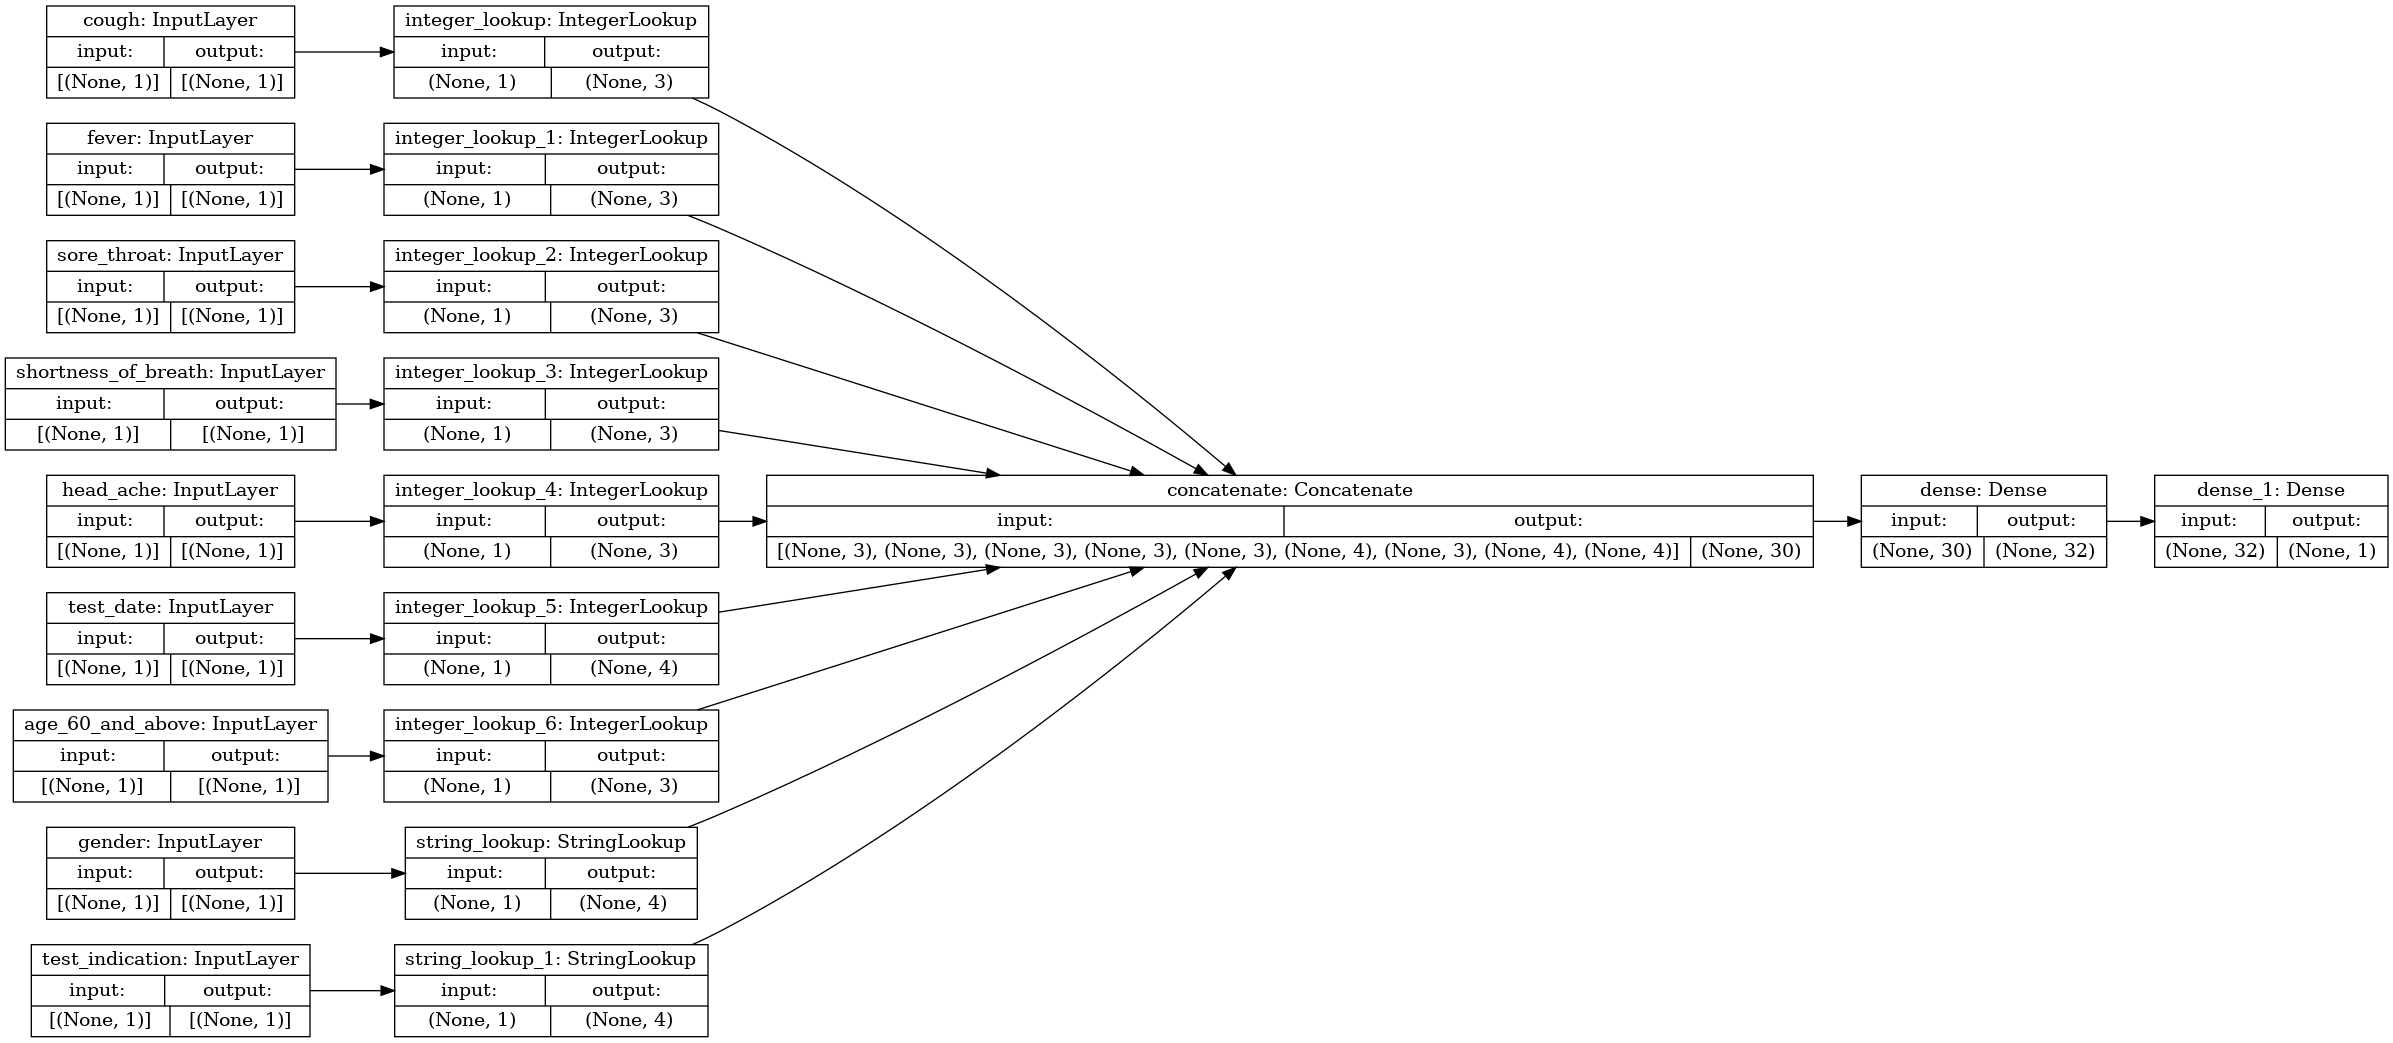

In [85]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [86]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
46383/46383 [==============================] - 89s 2ms/step - loss: 0.2305 - accuracy: 0.9214 - val_loss: 0.2235 - val_accuracy: 0.9241
Epoch 2/10
46383/46383 [==============================] - 88s 2ms/step - loss: 0.2286 - accuracy: 0.9223 - val_loss: 0.2246 - val_accuracy: 0.9243
Epoch 3/10
46383/46383 [==============================] - 88s 2ms/step - loss: 0.2284 - accuracy: 0.9223 - val_loss: 0.2236 - val_accuracy: 0.9231
Epoch 4/10
46383/46383 [==============================] - 88s 2ms/step - loss: 0.2283 - accuracy: 0.9225 - val_loss: 0.2247 - val_accuracy: 0.9242
Epoch 5/10
46383/46383 [==============================] - 89s 2ms/step - loss: 0.2282 - accuracy: 0.9225 - val_loss: 0.2239 - val_accuracy: 0.9243
Epoch 6/10
46383/46383 [==============================] - 92s 2ms/step - loss: 0.2281 - accuracy: 0.9225 - val_loss: 0.2235 - val_accuracy: 0.9243
Epoch 7/10
46383/46383 [==============================] - 90s 2ms/step - loss: 0.2281 - accuracy: 0.9227 - val_loss: 0

## Prediction

In [87]:
test_path_modified = '../input/symptoms-test/test.csv'

In [88]:
test_ds = tf.data.experimental.make_csv_dataset(
    test_path_modified,
    batch_size=16,
    num_epochs=1,
    shuffle_buffer_size=10000,
    shuffle_seed = 12,
    ignore_errors=True,
    header=True)

In [89]:
    #testing_data['gender'].fillna('unknown')

In [90]:
#for column in testing_data:
 #   if testing_data[column].isnull().values.any():
  #      print(column)

In [91]:
#testing_data['gender'] = testing_data['gender'].fillna('None')

In [92]:
#for column in testing_data:
 #   testing_data[column] = tf.convert_to_tensor(testing_data[column].tolist())

In [93]:
#testing_data

In [94]:
#testing_data = test_df.drop(columns=['test_date'])
#testing_data['gender'] = testing_data['gender'].fillna('None')

In [95]:
#testing_dict = []
#for item in testing_data:
 #   testing_dict.append({name: tf.convert_to_tensor([value]) for name, value in item.items()})
#input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
#predic|tions = reloaded_model.predict(input_dict)
#prob = tf.nn.sigmoid(predictions[0])

In [96]:
#test_df.drop(columns=['test_date','Index']).reset_index(drop=True).to_dict(orient='records')

In [97]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df#.pop(target)
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [98]:
test_df['test_date'] = test_df['test_date'].str.split('-',expand=True)[1].astype(str).astype(int)
test_df['test_date'] = test_df['test_date'].astype(str).astype(int)
test_df['age_60_and_above'] = test_df['age_60_and_above'].astype(str).astype(int)

In [99]:
test_df

,Index,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
0,0,10,0,0,0,0,0,1,male,Other
1,1,10,0,0,0,0,0,0,female,Other
2,2,10,0,0,0,0,0,0,male,Other
3,3,10,0,0,0,0,0,0,male,Contact with confirmed
4,4,10,0,0,0,0,0,0,female,Other
...,...,...,...,...,...,...,...,...,...,...
206140,206140,11,0,0,0,0,0,0,male,Other
206141,206141,10,0,0,0,0,0,0,male,Other
206142,206142,9,0,0,0,0,0,0,female,Other
206143,206143,9,0,0,0,0,0,1,female,Other


In [100]:
#Re order test_df columns
cols = test_df.drop(columns=['Index']).columns.tolist()
first = cols[0]
for i in range(1,6):
    cols[i-1] = cols[i]
cols[5] = first
cols

['cough',
 'fever',
 'sore_throat',
 'shortness_of_breath',
 'head_ache',
 'test_date',
 'age_60_and_above',
 'gender',
 'test_indication']

In [101]:
test_df = test_df[cols]

In [102]:
test_df = test_df.dropna()

In [103]:
test_df.to_csv('test.csv')

In [104]:
testing_dict = test_df.to_dict(orient='records')

In [105]:
#testing_dict_tensor = []
#for item in testing_dict:
    #testing_dict_tensor.append({name: tf.convert_to_tensor([value]) if name in ['age_60_and_above','gender','test_indication']  else tf.convert_to_tensor([value],dtype='int64') for name, value in item.items()})
    #testing_dict_tensor.append({name: tf.strings.to_number(tf.convert_to_tensor([value]),out_type=tf.dtypes.int64) if name in ['age_60_and_above']  else tf.convert_to_tensor([value]) for name, value in item.items()})
    #testing_dict_tensor.append({name: tf.convert_to_tensor([value])  for name, value in item.items()})

In [106]:
test_df.dtypes

cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
test_date               int64
age_60_and_above        int64
gender                 object
test_indication        object
dtype: object

In [107]:
class_names = ['NORMAL','COVID']

In [108]:
"""
sample = {
    'cough':  1,
    'fever': 1,
    'sore_throat': 1,
    'shortness_of_breath': 0,
    'head_ache': 0,
    'test_date': 10,
    'age_60_and_above': 0,
    'gender': 'female',
    'test_indication': 'Other'
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
input_list = []
input_list.append(input_dict)
input_list.append(input_dict)
input_list = np.array(input_list)
"""

"\nsample = {\n    'cough':  1,\n    'fever': 1,\n    'sore_throat': 1,\n    'shortness_of_breath': 0,\n    'head_ache': 0,\n    'test_date': 10,\n    'age_60_and_above': 0,\n    'gender': 'female',\n    'test_indication': 'Other'\n}\n\ninput_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}\ninput_list = []\ninput_list.append(input_dict)\ninput_list.append(input_dict)\ninput_list = np.array(input_list)\n"

In [109]:
#predictions = model.predict(testing_dict_tensor[6226],batch_size=batch_size)
#score = tf.nn.sigmoid(predictions[0])#tf.nn.softmax(predictions[0])
#print(
#    "This image most likely belongs to {} with a {:.2f} percent confidence."
#    .format(class_names[np.argmax(score)], 100 * np.max(score))
#)
#np.argmax(score)
#score = predictions[0][0]
#scoreint = round(score)
#prob = tf.nn.sigmoid(predictions[0])
#(100 * prob)
#A3 = tf.nn.sigmoid(predictions[0])
# ...

#pred = tf.greater(score, 0.5)
#class_label = tf.cast(pred, tf.int32)
#pred = 0 if score <= 0.5 else 1
#print(
#    "This patient is most likely {} with a {:.2f} percent confidence."
#    .format(class_names[pred], 100 * score)
#)
#tf.argmax(predictions, 1)

#score
#model.predict_classes(input_dict), axi
 

NameError: name 'score' is not defined

In [ ]:
len(testing_dict_tensor)

In [ ]:
#predictions = []
#i=0
#for input in testing_dict_tensor:
 #   i=i+1
  #  predictions.append(model.predict(input,batch_size=batch_size))
    
   # if i > 1000:
    #    break

In [110]:
predictions = model.predict(test_ds,batch_size=batch_size)

/opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys [''] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


<AxesSubplot:ylabel='Count'>

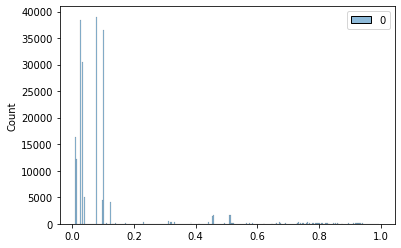

In [111]:
sns.histplot(predictions)

In [115]:
i =0
h = 0
predictions_labeled = []
for pred in predictions:
    
    #score = tf.nn.softmax(pred)
    score = pred
    idx = 0 if score < 0.5 else 1
    #predicted_class = tf.greater(pred,0.5)
    #correct = tf.where(predicted_class, 1, 0)#tf.equal(predicted_class, 1.0)
    #accuracy = tf.reduce_mean( tf.cast(correct, 'float') )
    #idx = int(correct)
    #print(correct[0])
    if idx == 1:
        h = h +1
    #print(
    #"This image most likely belongs to {} with a {:.2f} percent confidence."
    #.format(classes[np.argmax(score)], 100 * np.max(score)))
    predictions_labeled.append([i,idx])
    i = i+1
    
print("{} patients predicted with covid".format(h))

12384 patients predicted with covid


In [116]:
result = pd.DataFrame(predictions_labeled,columns=['Index','corona_result'])
result.to_csv('output.csv',index=False)

In [117]:
result[result['corona_result'] == 1]

,Index,corona_result
1,1,1
56,56,1
57,57,1
106,106,1
184,184,1
...,...,...
205545,205545,1
205546,205546,1
205584,205584,1
205595,205595,1


In [118]:
model.save('covid_classifier')

2022-01-27 13:00:40.766214: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [119]:
reloaded_model = tf.keras.models.load_model('covid_classifier')